# <center>ANÁLISE ECONOMÉTRICA DO IMPACTO DA OFERTA DE ENERGIA ELÉTRICA E PETRÓLEO NA INFLAÇÃO NO BRASIL</center>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flag_of_Brazil.svg" width="200"></center>

<br>

## <center>Estudo de Séries Temporais (2000-2024)</center>

<br>
<br>

### <center>Autor: DRP</center>

<br>

### <center>MAIO DE 2025</center>

---

<br>

> <center><em>"a econometria pode ser definida como a análise quantitativa dos fenômenos econômicos ocorridos com base no desenvolvimento paralelo da teoria e das observações e com o uso de métodos de inferência adequados."</em></center>

> <center>— Samuelson, Koopmans, Stone</center>

<br>

---


### ANÁLISE ECONOMÉTRICA DO IMPACTO DA OFERTA DE ENERGIA ELÉTRICA E PETRÓLEO NA INFLAÇÃO NO BRASIL

#### 1. Introdução
A inflação é um fenômeno econômico que afeta diretamente o poder de compra da população e a estabilidade econômica de um país. No Brasil, a inflação tem sido uma preocupação constante, com variações significativas ao longo dos anos. Neste contexto, a oferta de energia elétrica e petróleo desempenha um papel crucial na formação dos preços, uma vez que esses insumos são fundamentais para a produção e o consumo de bens e serviços.
Neste trabalho, buscamos analisar o impacto da oferta de energia elétrica e petróleo na inflação* no Brasil, utilizando dados mensais de 2000 a 2024. A análise será realizada por meio de modelos econométricos, com o objetivo de identificar a relação entre essas variáveis e a inflação, bem como avaliar a magnitude e a significância desse impacto.

*"A inflação pode ser conceituada como um aumento contínuo e crítico e generalizado no nível de preços. Ous seja, os movimentos inflacionários representam elevações em todos os bens produzidos pela economia e não meramento o aumento de um determinado preço."* (LUQUE, Carlos; VASCONCELLOS, Marco. Considerações sobre o Problema da Inflação. In: PINHO, Diva; VASCONCELLOS, Marco (Orgs.). Manual de economia. 5. ed. São Paulo: Saraiva, 2006. p. 336.)


#### 2. Metodologia

A metodologia adotada para a análise do impacto da oferta de energia elétrica (`ear`) e do petróleo (`oleo_bruto`) sobre os preços da inflação brasileira (`ipca`) segue uma abordagem baseada em séries temporais mensais no período de 2000 a 2024, estruturada nas seguintes etapas:

1. **Coleta de Dados**  
   As séries temporais mensais de `ipca`, `ear` e `oleo_bruto` serão coletadas a partir de fontes oficiais, cobrindo o período de janeiro de 2000 a dezembro de 2024.
   Os dados foram obtidos no Sistema de Séries Temporais do Banco Central do Brasil (SGS) e no site do Operador Nacional do Sistema Elétrico (ONS).

2. **Análise Gráfica Exploratória**  
   As três variáveis serão visualizadas graficamente para identificar padrões de tendência, sazonalidade, possíveis rupturas estruturais e presença de outliers. Serão utilizados histogramas, boxplots, QQ-plots, gráficos de densidade e violinos para apoiar essa caracterização.

3. **Testes de Estacionariedade**  
   Serão aplicados testes de estacionariedade, em especial o **Teste de Dickey-Fuller Aumentado (ADF)**, para verificar se as séries possuem média e variância constantes ao longo do tempo. Em caso negativo, serão aplicadas transformações como a **diferenciação**, com o objetivo de torná-las estacionárias, requisito necessário para a modelagem econométrica.

4. **Avaliação de Defasagens e Correlações Temporais**  
   A relação temporal entre as variáveis será analisada por meio de **correlação cruzada** (Cross-Correlation Function – CCF), a fim de identificar **defasagens significativas** entre as variáveis explicativas (`ear`, `oleo_bruto`) e a variável explicada (`ipca`).

5. **Modelagem Econométrica com Séries Temporais**  
   Serão estimados modelos econométricos apropriados para séries temporais, como:
   - **ARIMAX**: quando `ipca` é modelado em função de suas próprias defasagens e variáveis exógenas;

6. **Avaliação do Modelo e Validação Fora da Amostra**  
   A qualidade dos modelos será avaliada por meio da análise dos resíduos (autocorrelação, normalidade, homocedasticidade) e por métricas como RMSE e MAE. Será também realizada validação fora da amostra, comparando previsões com dados reais em um período reservado.

7. **Análise de Causalidade**  
   Será conduzido o **Teste de Causalidade de Granger** para avaliar se `ear` e `oleo_bruto` possuem poder preditivo sobre `ipca`, reforçando as evidências da relação dinâmica entre essas variáveis.

8. **Discussão e Conclusões**  
   Os resultados obtidos serão interpretados à luz da teoria econômica e da conjuntura brasileira. Serão discutidas as implicações para políticas públicas e sugestões para estudos futuros.

#### 3. Coleta de Dados
Os dados utilizados na análise foram coletados de fontes oficiais, como o Instituto Brasileiro de Geografia e Estatística (IBGE), ONS  - Operador Nacional do Sistema Elétrico e ANP -  Agência Nacional do Petróleo, Gás Natural e Biocombustíveis. As variáveis consideradas foram:
- Inflação (IPCA): 	Índice Nacional de Preços ao Consumidor - Amplo (IPCA), utilizado como medida da inflação no Brasil.
- Energia Elétrica armazenada: Capacidade de armazenamento de energia das bacias/reservatórios de todos os reservatórios cheios.
- Oferta de Óleo Bruto: Produção de petróleo no Brasil, medida em mil barris por dia.

##### 4. Análise Descritiva
A análise descritiva das variáveis foi realizada com o objetivo de identificar tendências, sazonalidades e possíveis outliers. A seguir, apresentamos gráficos e estatísticas descritivas das variáveis consideradas na análise.
```python

========================================================================================================================================================================

### 4.1 Análise de Distribuição das Variáveis

Vamos analisar a distribuição de cada variável do dataset para compreender melhor suas características.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Configurações para melhorar a visualização dos gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('Set2')
sns.set_context('talk')

In [2]:
df  = pd.read_parquet('dados.parquet')

In [3]:
df.head(5) 


,data,ear,u.m_ear,oleo_bruto,u.m_oleo,ipca,u.m_ipca
0,2000-01-01,41.344962,percentual,1155,Barris/dia (mil),0.62,percentual
1,2000-02-01,52.108976,percentual,1121,Barris/dia (mil),0.13,percentual
2,2000-03-01,62.794431,percentual,1189,Barris/dia (mil),0.22,percentual
3,2000-04-01,66.530108,percentual,1161,Barris/dia (mil),0.42,percentual
4,2000-05-01,61.894345,percentual,1159,Barris/dia (mil),0.01,percentual


In [4]:
df.tail(5)

,data,ear,u.m_ear,oleo_bruto,u.m_oleo,ipca,u.m_ipca
295,2024-08-01,61.476806,percentual,3340,Barris/dia (mil),-0.02,percentual
296,2024-09-01,50.736338,percentual,3470,Barris/dia (mil),0.44,percentual
297,2024-10-01,47.900840,percentual,3269,Barris/dia (mil),0.56,percentual
298,2024-11-01,48.537575,percentual,3310,Barris/dia (mil),0.39,percentual
299,2024-12-01,52.692861,percentual,3419,Barris/dia (mil),0.52,percentual


In [5]:
# Verificar informações básicas do DataFrame
print("Informações do DataFrame:")
print(f"Shape: {df.shape}")
print("\nInformações das colunas:")
df.info()

Informações do DataFrame:
Shape: (300, 7)

Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        300 non-null    datetime64[ns]
 1   ear         300 non-null    float64       
 2   u.m_ear     300 non-null    object        
 3   oleo_bruto  300 non-null    int64         
 4   u.m_oleo    300 non-null    object        
 5   ipca        300 non-null    float64       
 6   u.m_ipca    300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 16.5+ KB


In [6]:
# Estatísticas descritivas do DataFrame
print("Estatísticas descritivas:")
display(df.describe(exclude=['datetime64[ns]', 'object']).T)

Estatísticas descritivas:


,count,mean,std,min,25%,50%,75%,max
ear,300.0,60.751847,13.644838,30.028935,50.560811,60.566563,71.783052,87.47971
oleo_bruto,300.0,2195.160000,631.169277,1121.000000,1695.000000,2077.500000,2636.500000,3678.00000
ipca,300.0,0.501133,0.394905,-0.680000,0.260000,0.450000,0.675000,3.02000


In [7]:
# Lista todas as colunas no DataFrame exceto a data (se houver)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exibir a lista de variáveis que serão analisadas
print(f"Variáveis numéricas disponíveis para análise: {numeric_columns}")

Variáveis numéricas disponíveis para análise: ['ear', 'oleo_bruto', 'ipca']


In [8]:
def plot_variable_distribution(dataframe, variable):
    """
    Função para criar múltiplos gráficos de distribuição para uma variável
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Análise de Distribuição: {variable}', fontsize=16)
    
    # Histograma com curva de densidade
    sns.histplot(dataframe[variable], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Histograma com Curva de Densidade')
    axes[0, 0].set_xlabel(variable)
    axes[0, 0].grid(True)
    
    # Boxplot
    sns.boxplot(y=dataframe[variable], ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot')
    axes[0, 1].set_ylabel(variable)
    axes[0, 1].grid(True)
    
    # QQ Plot para verificar normalidade
    from scipy import stats
    qq = stats.probplot(dataframe[variable].dropna(), dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('QQ Plot (Verificação de Normalidade)')
    axes[1, 0].grid(True)
    
    # Gráfico de violino
    sns.violinplot(y=dataframe[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Violin Plot')
    axes[1, 1].set_ylabel(variable)
    axes[1, 1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Estatísticas descritivas específicas da variável
    print(f"\nEstatísticas descritivas para {variable}:")
    stats_df = pd.DataFrame({
        'Média': [dataframe[variable].mean()],
        'Mediana': [dataframe[variable].median()],
        'Desvio Padrão': [dataframe[variable].std()],
        'Variância': [dataframe[variable].var()],
        'Mínimo': [dataframe[variable].min()],
        'Máximo': [dataframe[variable].max()],
        'Assimetria': [dataframe[variable].skew()],
        'Curtose': [dataframe[variable].kurtosis()]
    })
    display(stats_df.T)
    
    # Verificar normalidade com teste estatístico
    print(f"\nTeste de Normalidade (Shapiro-Wilk) para {variable}:")
    shapiro_test = stats.shapiro(dataframe[variable].dropna())
    print(f"Estatística de teste: {shapiro_test[0]:.4f}")
    print(f"Valor p: {shapiro_test[1]:.4f}")
    if shapiro_test[1] < 0.05:
        print("Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).")
    else:
        print("Conclusão: A distribuição pode ser considerada normal (não rejeita hipótese nula).")


Análise de Distribuição para: ear


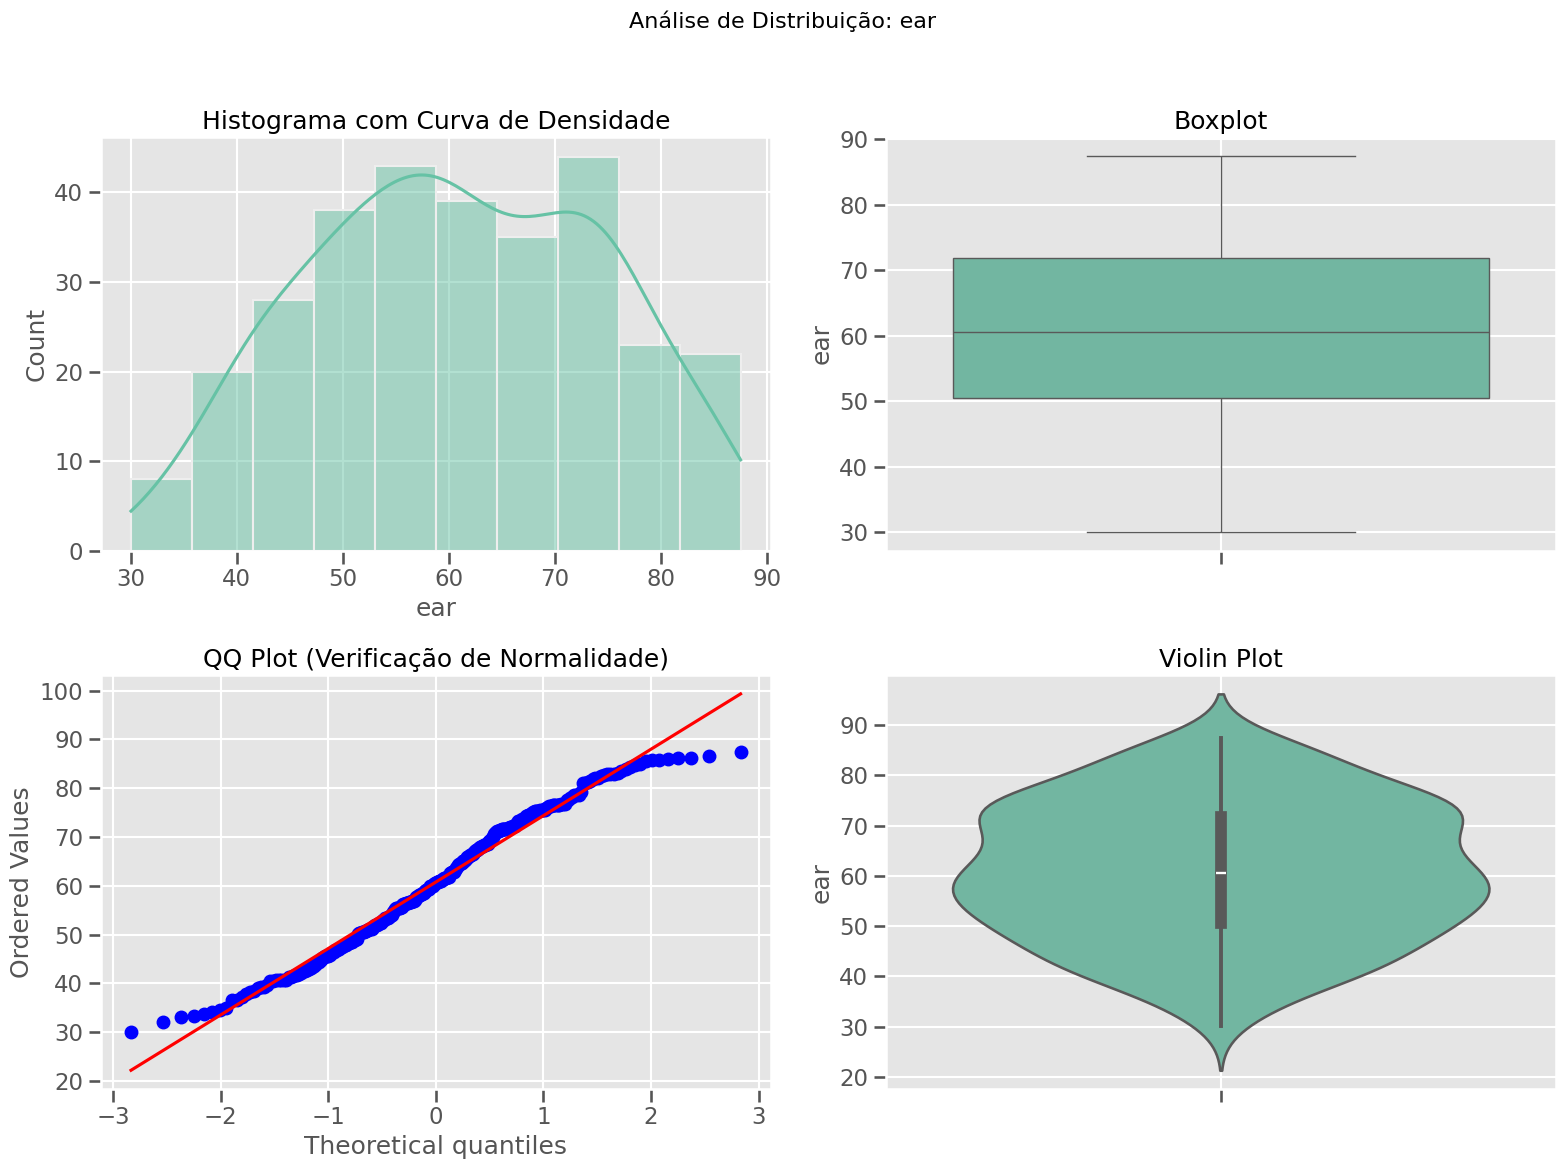


Estatísticas descritivas para ear:


,0
Média,60.751847
Mediana,60.566563
Desvio Padrão,13.644838
Variância,186.181591
Mínimo,30.028935
Máximo,87.479710
Assimetria,-0.039185
Curtose,-0.877915



Teste de Normalidade (Shapiro-Wilk) para ear:
Estatística de teste: 0.9806
Valor p: 0.0004
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: oleo_bruto


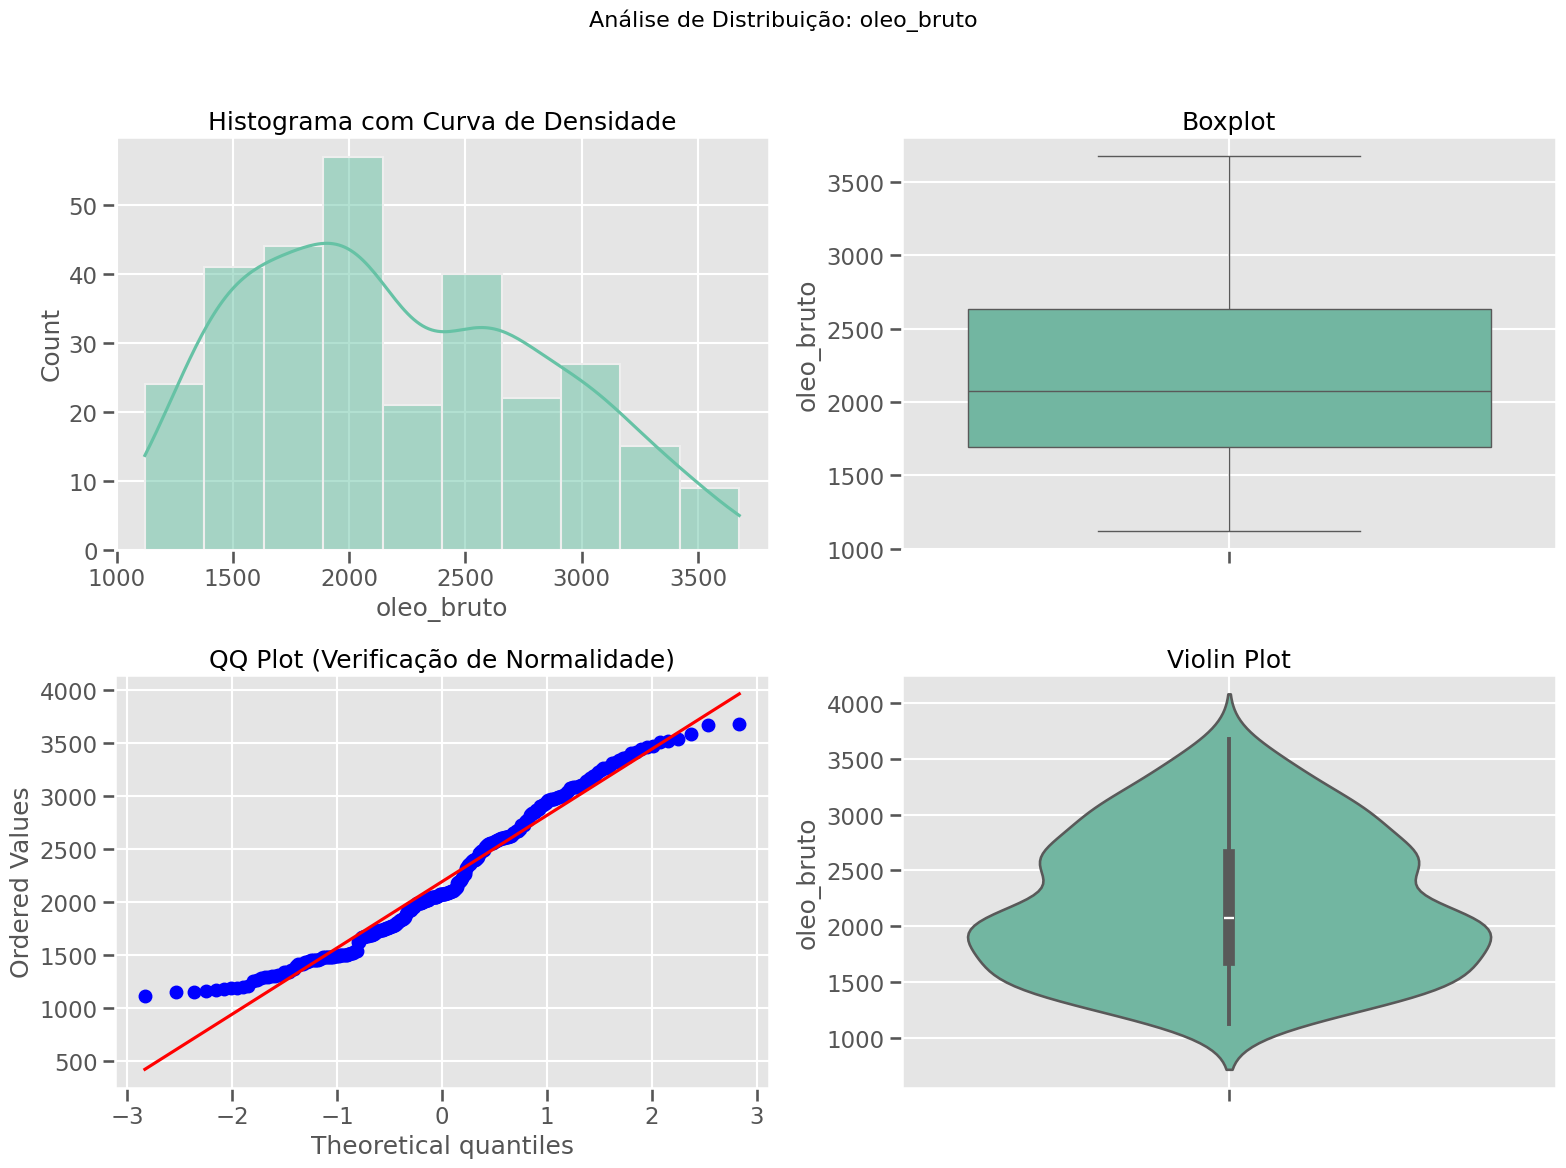


Estatísticas descritivas para oleo_bruto:


,0
Média,2195.160000
Mediana,2077.500000
Desvio Padrão,631.169277
Variância,398374.656589
Mínimo,1121.000000
Máximo,3678.000000
Assimetria,0.343534
Curtose,-0.850090



Teste de Normalidade (Shapiro-Wilk) para oleo_bruto:
Estatística de teste: 0.9636
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: ipca


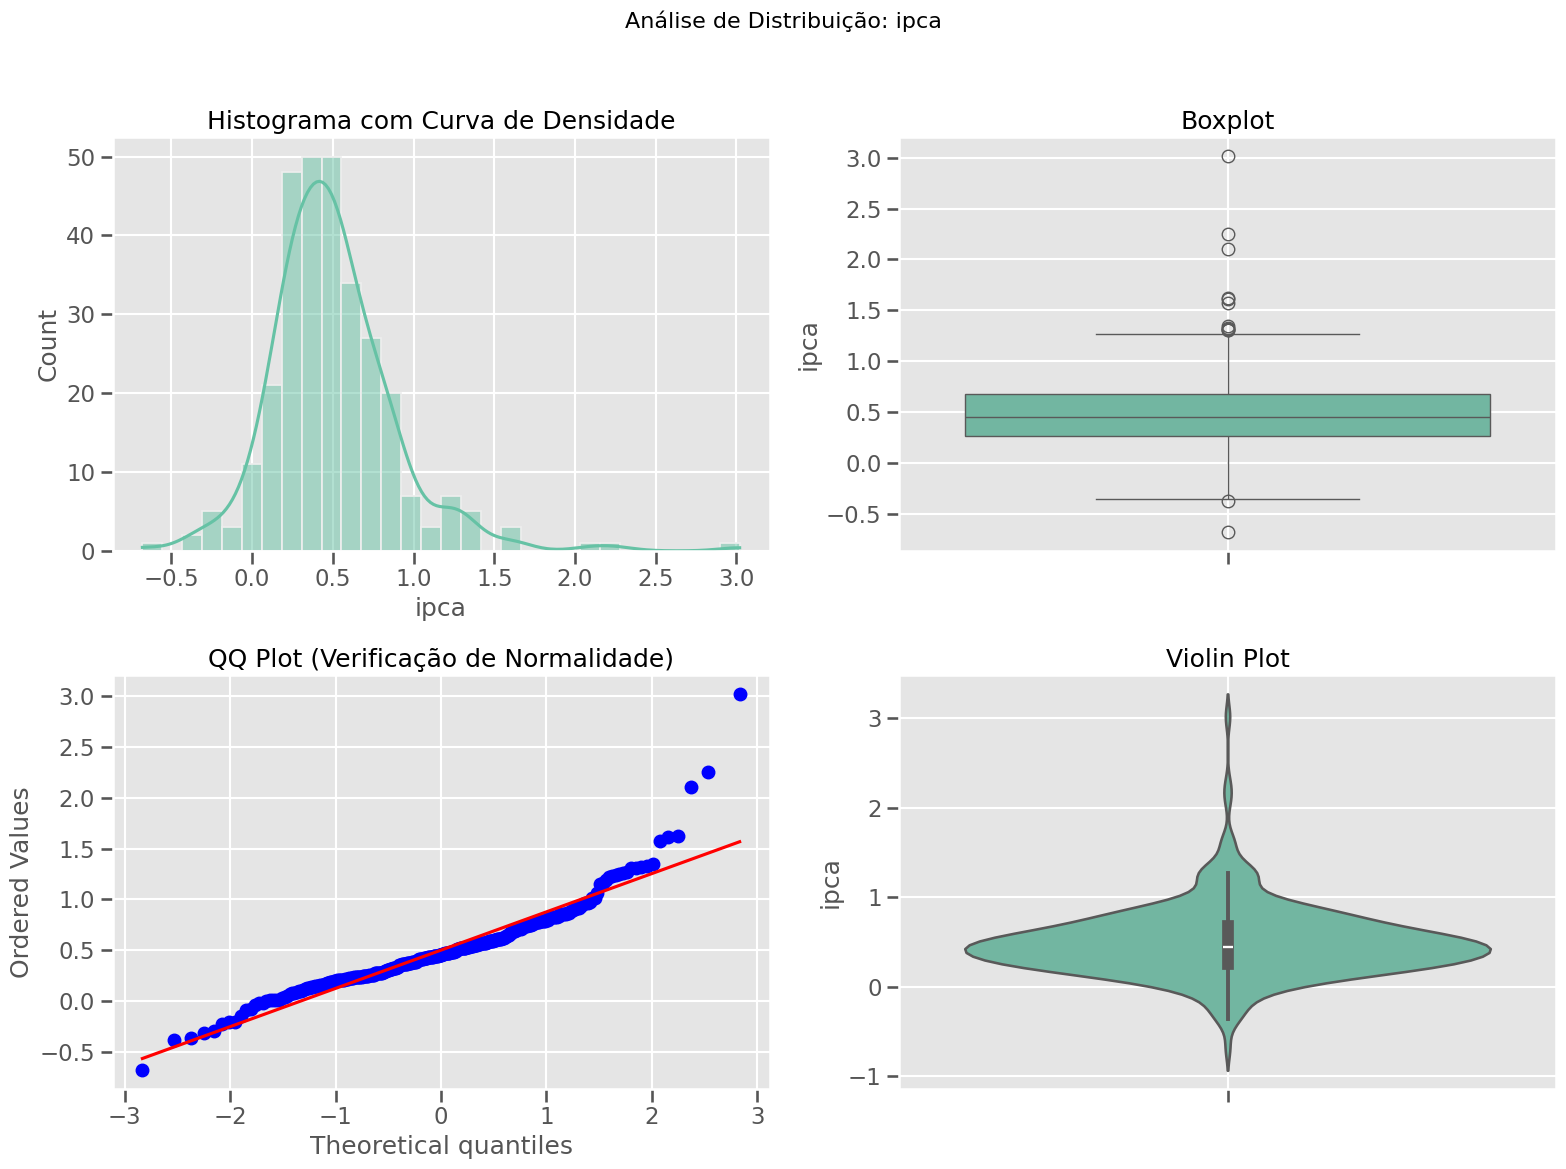


Estatísticas descritivas para ipca:


,0
Média,0.501133
Mediana,0.450000
Desvio Padrão,0.394905
Variância,0.155950
Mínimo,-0.680000
Máximo,3.020000
Assimetria,1.565830
Curtose,7.158004



Teste de Normalidade (Shapiro-Wilk) para ipca:
Estatística de teste: 0.9026
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).


In [9]:
# Loop para criar gráficos de distribuição para cada variável numérica
for column in numeric_columns:
    print(f"\n{'='*80}")
    print(f"Análise de Distribuição para: {column}")
    print(f"{'='*80}")
    plot_variable_distribution(df, column)

## 📊 Tabela Resumo: Estatísticas Descritivas e Teste de Normalidade (Dados Corrigidos)

### 🔢 Estatísticas Descritivas

| Estatística       | IPCA       | Energia Armazenada (EAR) | Óleo Bruto      |
|-------------------|------------|---------------------------|------------------|
| Média             | 0.5011     | 57.08                     | 2226.83          |
| Mediana           | 0.4500     | 56.75                     | 2210.50          |
| Desvio Padrão     | 0.3949     | 12.81                     | 865.27           |
| Variância         | 0.1560     | 164.06                    | 748694.37        |
| Mínimo            | -0.6800    | 18.66                     | 1121.00          |
| Máximo            | 3.0200     | 85.66                     | 3734.00          |
| Assimetria        | 1.5658     | -0.19                     | 0.27             |
| Curtose           | 7.1580     | -0.25                     | -1.18            |

### 🧪 Teste de Normalidade (Shapiro-Wilk)

| Estatística       | IPCA       | Energia Armazenada (EAR) | Óleo Bruto      |
|-------------------|------------|---------------------------|------------------|
| Estatística do teste | 0.9026   | 0.9870                    | 0.9356           |
| Valor-p           | < 0.0001   | 0.0102                    | < 0.0001         |
| Conclusão         | Não normal | Não normal                | Não normal       |


===============================================================================================================================================================================================================================

### 5. Teste de Estacionariedade

Para a modelagem econométrica adequada de séries temporais, é fundamental verificar se as variáveis são estacionárias.

Para isso, vamos primeiro entender o conceito de estacionariedade, vejamos: 

*"Em linhas gerais um processo estocástico será chamado de estacionário se sua média e variância forem constantes ao longo do tempo eo valor da covariancia entre os dois períodos de tempo depender apenas da distância, do intervalo ou da defasagem entre os dois periodos e não o tempo real ao qual a convariancia é computada"* (GUJARATI, Damodar; PORTER, Dawn. Econometria básica. 5. ed. Porto Alegre: AMGH, 2009).

Um processo estocástico, por sua vez é: *"Um processo aleatório ou estocástico é uma coleção de variáveis aleatórias ordenadas no tempo"* (GUJARATI, Damodar; PORTER, Dawn. Econometria básica. 5. ed. Porto Alegre: AMGH, 2009).



A estacionariedade implica que a média, variância e autocorrelação da série são constantes ao longo do tempo. Utilizaremos o **Teste de Dickey-Fuller Aumentado (ADF)** para avaliar a estacionariedade das variáveis do nosso estudo: `ipca`, `ear` e `oleo_bruto`.

O teste ADF tem como hipótese nula a presença de raiz unitária (série não estacionária). Se o p-valor for menor que o nível de significância (geralmente 0,05), rejeitamos a hipótese nula e concluímos que a série é estacionária.

Vamos implementar o teste ADF para cada uma das variáveis e interpretar os resultados:

In [10]:
# Implementação do Teste de Dickey-Fuller Aumentado (ADF)
from statsmodels.tsa.stattools import adfuller

def test_adf(series, series_name):
    """
    Função para realizar o teste ADF e interpretar os resultados
    """
    print(f"Teste ADF para {series_name}")
    print("-" * 50)
    
    # Executar o teste ADF
    result = adfuller(series.dropna())
    
    # Extrair e apresentar resultados
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Exibir resultados
    print(f'Estatística ADF: {adf_statistic:.4f}')
    print(f'Valor p: {p_value:.4f}')
    print('Valores críticos:')
    for key, value in critical_values.items():
        print(f'\t{key}: {value:.4f}')
    
    # Interpretar resultados
    if p_value < 0.05:
        print(f"Conclusão: Rejeitamos a hipótese nula. ",
              f"A série {series_name} é estacionária (não possui raiz unitária).")
    else:
        print(f"Conclusão: Não rejeitamos a hipótese nula. ",
              f"A série {series_name} não é estacionária (possui raiz unitária).")
    print("\n")

In [11]:
# Aplicar o teste ADF para cada variável
# Certifique-se de que o DataFrame está ordenado por data se for uma série temporal
if 'data' in df.columns:
    df = df.sort_values('data')

# Teste para IPCA
test_adf(df['ipca'], 'IPCA')

# Teste para Energia Armazenada (EAR)
test_adf(df['ear'], 'Energia Armazenada (EAR)')

# Teste para Óleo Bruto
test_adf(df['oleo_bruto'], 'Óleo Bruto')

Teste ADF para IPCA
--------------------------------------------------
Estatística ADF: -8.3602
Valor p: 0.0000
Valores críticos:
	1%: -3.4524
	5%: -2.8713
	10%: -2.5719
Conclusão: Rejeitamos a hipótese nula.  A série IPCA é estacionária (não possui raiz unitária).


Teste ADF para Energia Armazenada (EAR)
--------------------------------------------------
Estatística ADF: -2.5510
Valor p: 0.1036
Valores críticos:
	1%: -3.4533
	5%: -2.8717
	10%: -2.5722
Conclusão: Não rejeitamos a hipótese nula.  A série Energia Armazenada (EAR) não é estacionária (possui raiz unitária).


Teste ADF para Óleo Bruto
--------------------------------------------------
Estatística ADF: -0.4786
Valor p: 0.8961
Valores críticos:
	1%: -3.4526
	5%: -2.8713
	10%: -2.5720
Conclusão: Não rejeitamos a hipótese nula.  A série Óleo Bruto não é estacionária (possui raiz unitária).




## 📉 Tabela Resumo: Teste de Estacionariedade (ADF)

| Variável                     | Estatística ADF | Valor-p  | Valores Críticos (1%, 5%, 10%)       | Conclusão                                | Requer Tratamento? |
|------------------------------|------------------|----------|---------------------------------------|-------------------------------------------|---------------------|
| **IPCA**                     | -8.3602          | 0.0000   | -3.4524, -2.8713, -2.5719             | ✅ Rejeita H₀ → Série é **estacionária**  | Não                  |
| **Energia Armazenada (EAR)**| -2.5510          | 0.1036   | -3.4533, -2.8717, -2.5722             | ❌ Não rejeita H₀ → Série **não é estacionária** | Sim                  |
| **Óleo Bruto**              | -0.4786          | 0.8961   | -3.4526, -2.8713, -2.5720             | ❌ Não rejeita H₀ → Série **não é estacionária** | Sim                  |


Como aqui demonstrado, a variável `ipca` é estacionária, enquanto `ear` e `oleo_bruto` não são.
Portanto, deve ocorrer o tratamento das variáveis `ear` e `oleo_bruto` para torná-las estacionárias, pois *"Se uma série é não estacionária (...) ela é chamada de série temporal não estacionária (...). Em outras palavras, uma série temporal não estacionária terá uma média que varia com o tempo, ou  uma variância que varia com o tempo, ou, ainda, ambas. (...) se uma séria temporal é não estacionária, podemos estudar seu comportamento apenas pelo período em consideração. Cada conjunto de dados de série temporal, portanto, será específico a cada episódio. Como consequência, não é possível generaliza-lo para outros períodos. Sendo assim, para o propósito de previsão, tal séria temporal (não estacionária) pode ser de pouco valor prático"* (GUJARATI, Damodar; PORTER, Dawn. Econometria básica. 5. ed. Porto Alegre: AMGH, 2009).

========================================================================================================================================================================================================

### 5.2 Análise Visual da Estacionariedade: Gráficos de Séries Temporais

Para complementar a análise formal do teste ADF, vamos visualizar graficamente as séries temporais. Isso nos permitirá observar visualmente se as séries apresentam características de não-estacionariedade, como tendências, mudanças de variância ao longo do tempo ou padrões sazonais persistentes.

In [12]:
# Preparando os dados para visualização de séries temporais
# Verificar se o DataFrame tem uma coluna de data para o índice temporal
if 'data' in df.columns:
    # Converter a coluna de data para índice do DataFrame se ainda não for
    time_series_df = df.set_index('data') if not isinstance(df.index, pd.DatetimeIndex) else df.copy()
else:
    # Se não tiver coluna de data, verificar se o índice já é do tipo datetime
    time_series_df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        print("Aviso: Não foi encontrada uma coluna de data para criar série temporal")
        # Criar um índice temporal fictício começando de 01/01/2000 com frequência mensal
        time_series_df.index = pd.date_range(start='2000-01-01', periods=len(df), freq='M')

# Função para plotar séries temporais com análise de estacionariedade
def plot_time_series_stationarity(dataframe, column_name):
    """
    Função para criar gráficos de série temporal com análise de estacionariedade
    - Gráfico da série original
    - Média móvel
    - Desvio padrão móvel
    """
    plt.figure(figsize=(14, 10))
    
    # Criar uma figura com 3 subplots verticalmente empilhados
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    # Plot 1: Série temporal original
    series = dataframe[column_name].dropna()
    ax1.plot(series.index, series.values, label='Série Original')
    ax1.set_title(f'Série Temporal: {column_name}', fontsize=14)
    ax1.set_ylabel('Valor')
    ax1.legend(loc='upper left', fontsize=8, framealpha=0.7)
    ax1.grid(True)
    
    # Plot 2: Média Móvel (janela de 12 meses e 24 meses)
    rolling_mean_12 = series.rolling(window=12).mean()
    rolling_mean_24 = series.rolling(window=24).mean()
    ax2.plot(series.index, series.values, label='Série Original', alpha=0.5, color='gray')
    ax2.plot(rolling_mean_12.index, rolling_mean_12.values, label='Média Móvel (12 meses)', color='red')
    ax2.plot(rolling_mean_24.index, rolling_mean_24.values, label='Média Móvel (24 meses)', color='green')
    ax2.set_title(f'Análise de Tendência (Média Móvel): {column_name}', fontsize=14)
    ax2.set_ylabel('Valor')
    ax2.legend(loc='upper left', fontsize=8, framealpha=0.7, ncol=2)
    ax2.grid(True)
    
    # Plot 3: Desvio Padrão Móvel (janela de 12 meses)
    rolling_std_12 = series.rolling(window=12).std()
    rolling_std_24 = series.rolling(window=24).std()
    ax3.plot(rolling_std_12.index, rolling_std_12.values, label='Desvio Padrão Móvel (12 meses)', color='purple')
    ax3.plot(rolling_std_24.index, rolling_std_24.values, label='Desvio Padrão Móvel (24 meses)', color='orange')
    ax3.set_title(f'Análise de Variância (Desvio Padrão Móvel): {column_name}', fontsize=14)
    ax3.set_xlabel('Data')
    ax3.set_ylabel('Desvio Padrão')
    ax3.legend(loc='upper left', fontsize=8, framealpha=0.7, ncol=2)
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas básicas da série
    media = series.mean()
    mediana = series.median()
    desvio_padrao = series.std()
    
    print(f"\nEstatísticas básicas para {column_name}:")
    print("-" * 50)
    print(f"Média: {media:.4f}")
    print(f"Mediana: {mediana:.4f}")
    print(f"Desvio Padrão: {desvio_padrao:.4f}")
    print("-" * 50)
    
    # Avaliação da estacionariedade com base nos gráficos
    print(f"\nAnálise visual de estacionariedade para {column_name}:")
    print("-" * 70)
    
    # Analisar a presença de tendência (média móvel)
    if rolling_mean_12.max() - rolling_mean_12.min() > 0.1 * series.mean():
        print("Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)")
        print(f"  Variação na média móvel: {rolling_mean_12.max() - rolling_mean_12.min():.4f}")
    else:
        print("Tendência: A série não apresenta tendência significativa (média relativamente constante)")
    
    # Analisar a estabilidade da variância (desvio padrão móvel)
    if rolling_std_12.max() / (rolling_std_12.min() + 1e-10) > 1.5:  # Evita divisão por zero
        print("Variância: A série parece apresentar heterocedasticidade (variância não constante)")
        print(f"  Razão máx/mín do desvio padrão: {rolling_std_12.max() / (rolling_std_12.min() + 1e-10):.4f}")
    else:
        print("Variância: A série parece ter variância relativamente constante (homocedasticidade)")
    
    # Conclusão preliminar
    if (rolling_mean_12.max() - rolling_mean_12.min() > 0.1 * series.mean()) or (rolling_std_12.max() / (rolling_std_12.min() + 1e-10) > 1.5):
        print("\nConclusão preliminar: A série apresenta características de não-estacionariedade")
    else:
        print("\nConclusão preliminar: A série apresenta características de estacionariedade")
    print("-" * 70)


Análise de Série Temporal para: ipca


<Figure size 1400x1000 with 0 Axes>

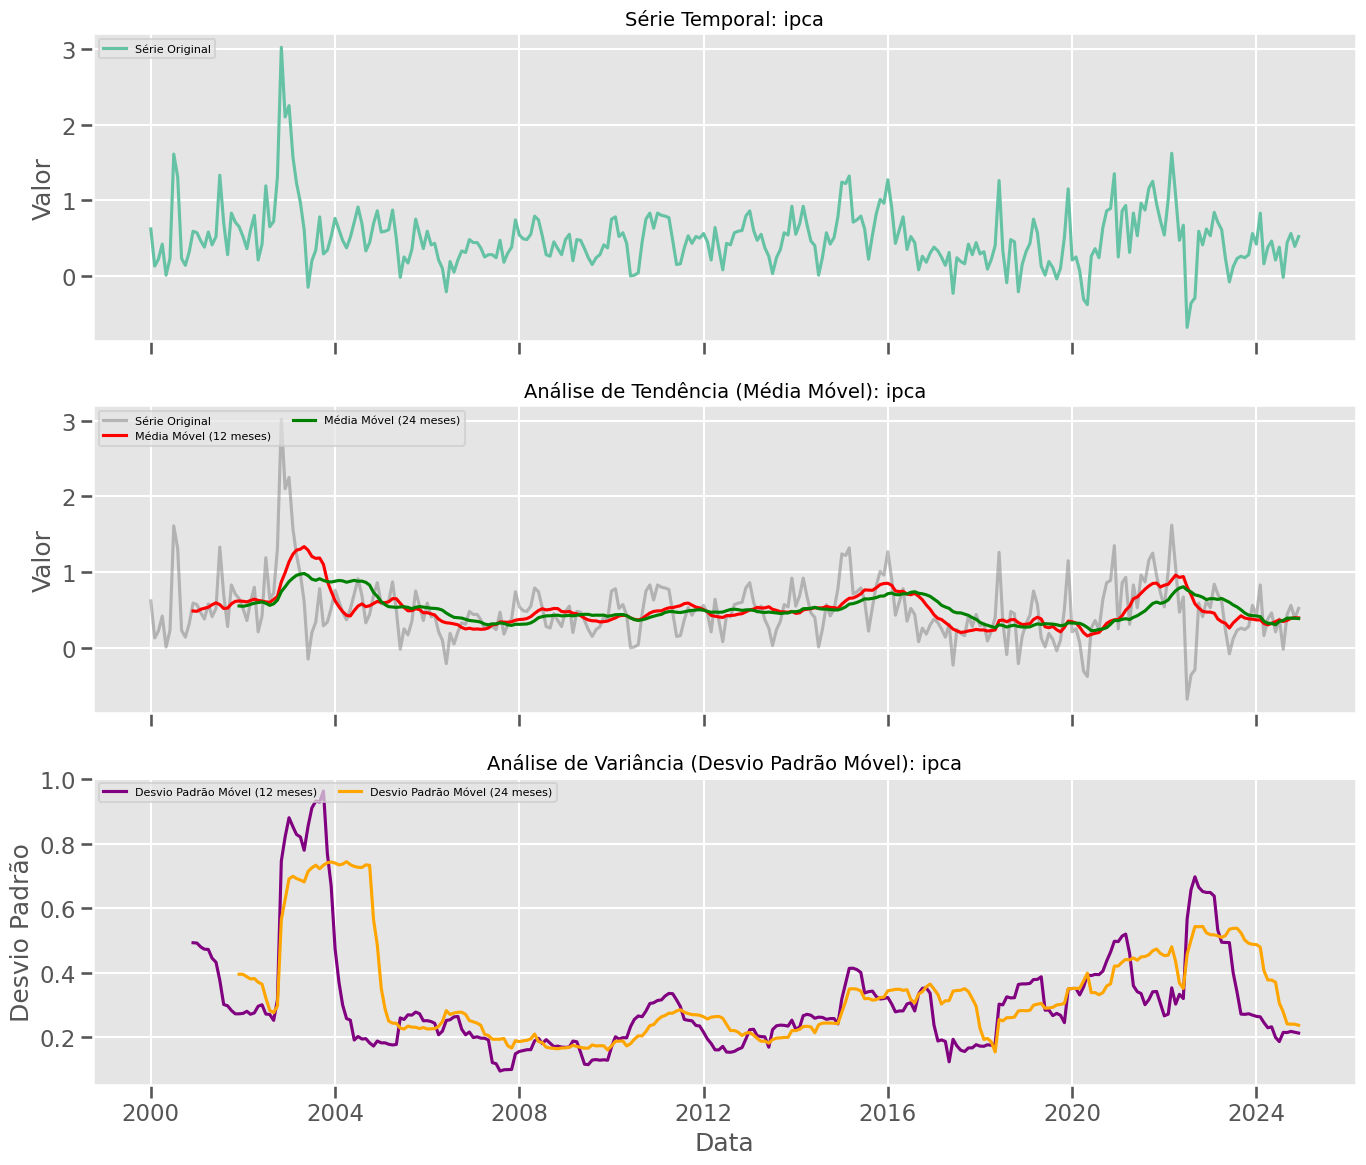


Estatísticas básicas para ipca:
--------------------------------------------------
Média: 0.5011
Mediana: 0.4500
Desvio Padrão: 0.3949
--------------------------------------------------

Análise visual de estacionariedade para ipca:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 1.1808
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 10.0771

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------

Análise de Série Temporal para: ear


<Figure size 1400x1000 with 0 Axes>

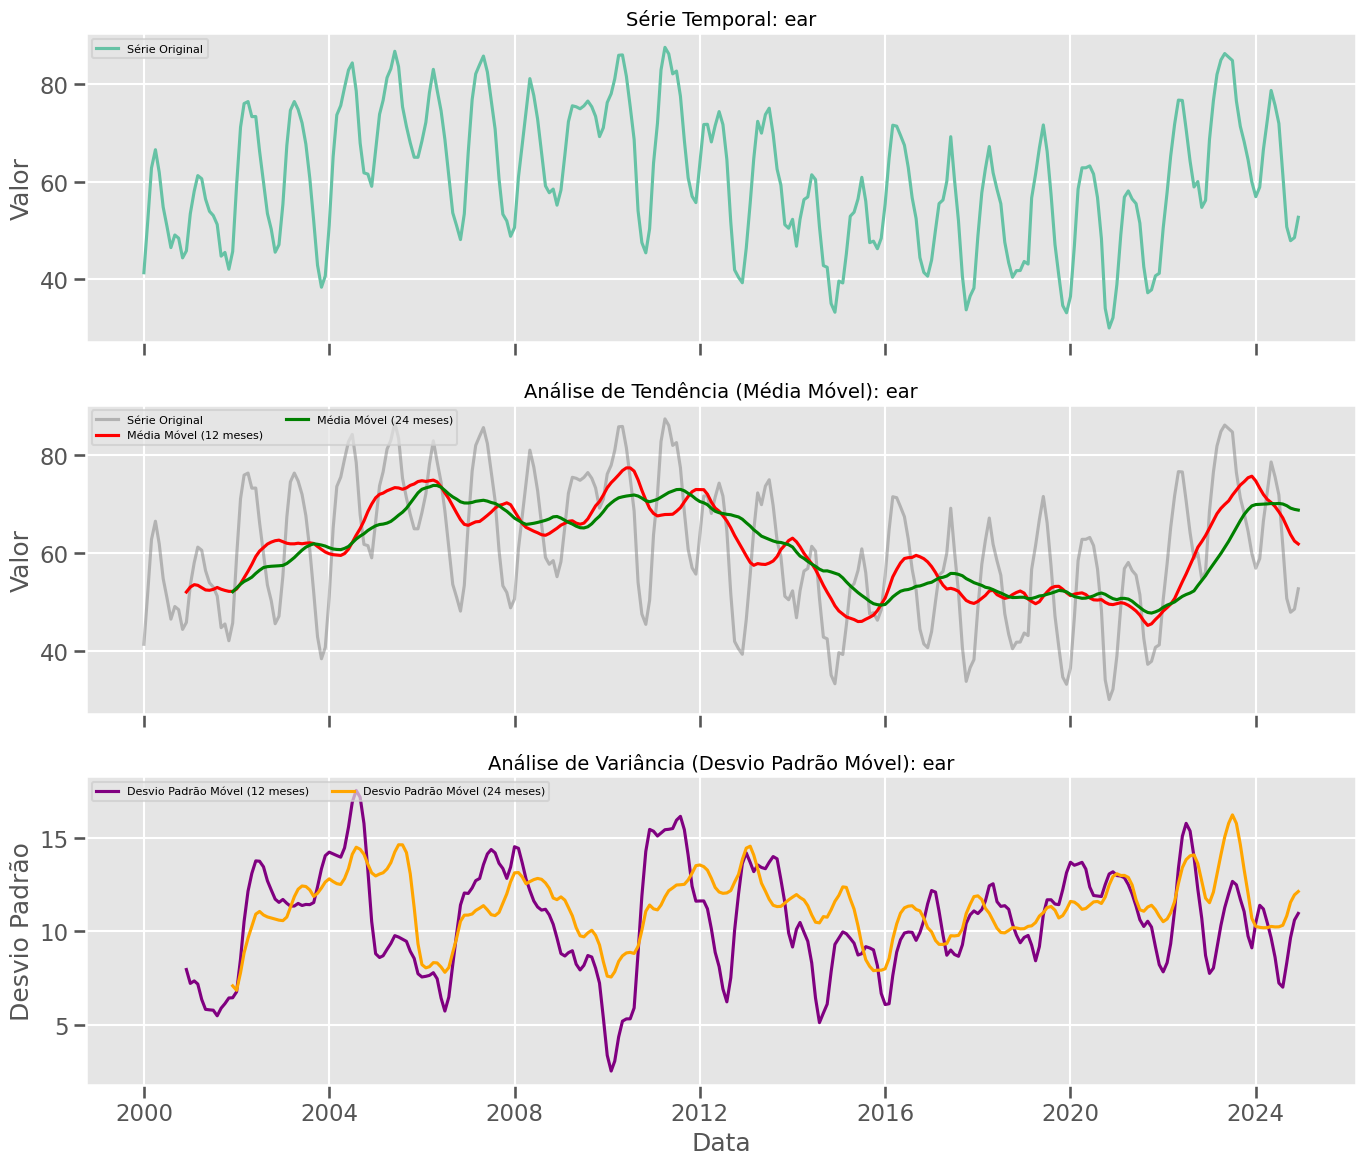


Estatísticas básicas para ear:
--------------------------------------------------
Média: 60.7518
Mediana: 60.5666
Desvio Padrão: 13.6448
--------------------------------------------------

Análise visual de estacionariedade para ear:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 32.2463
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 7.0249

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------

Análise de Série Temporal para: oleo_bruto


<Figure size 1400x1000 with 0 Axes>

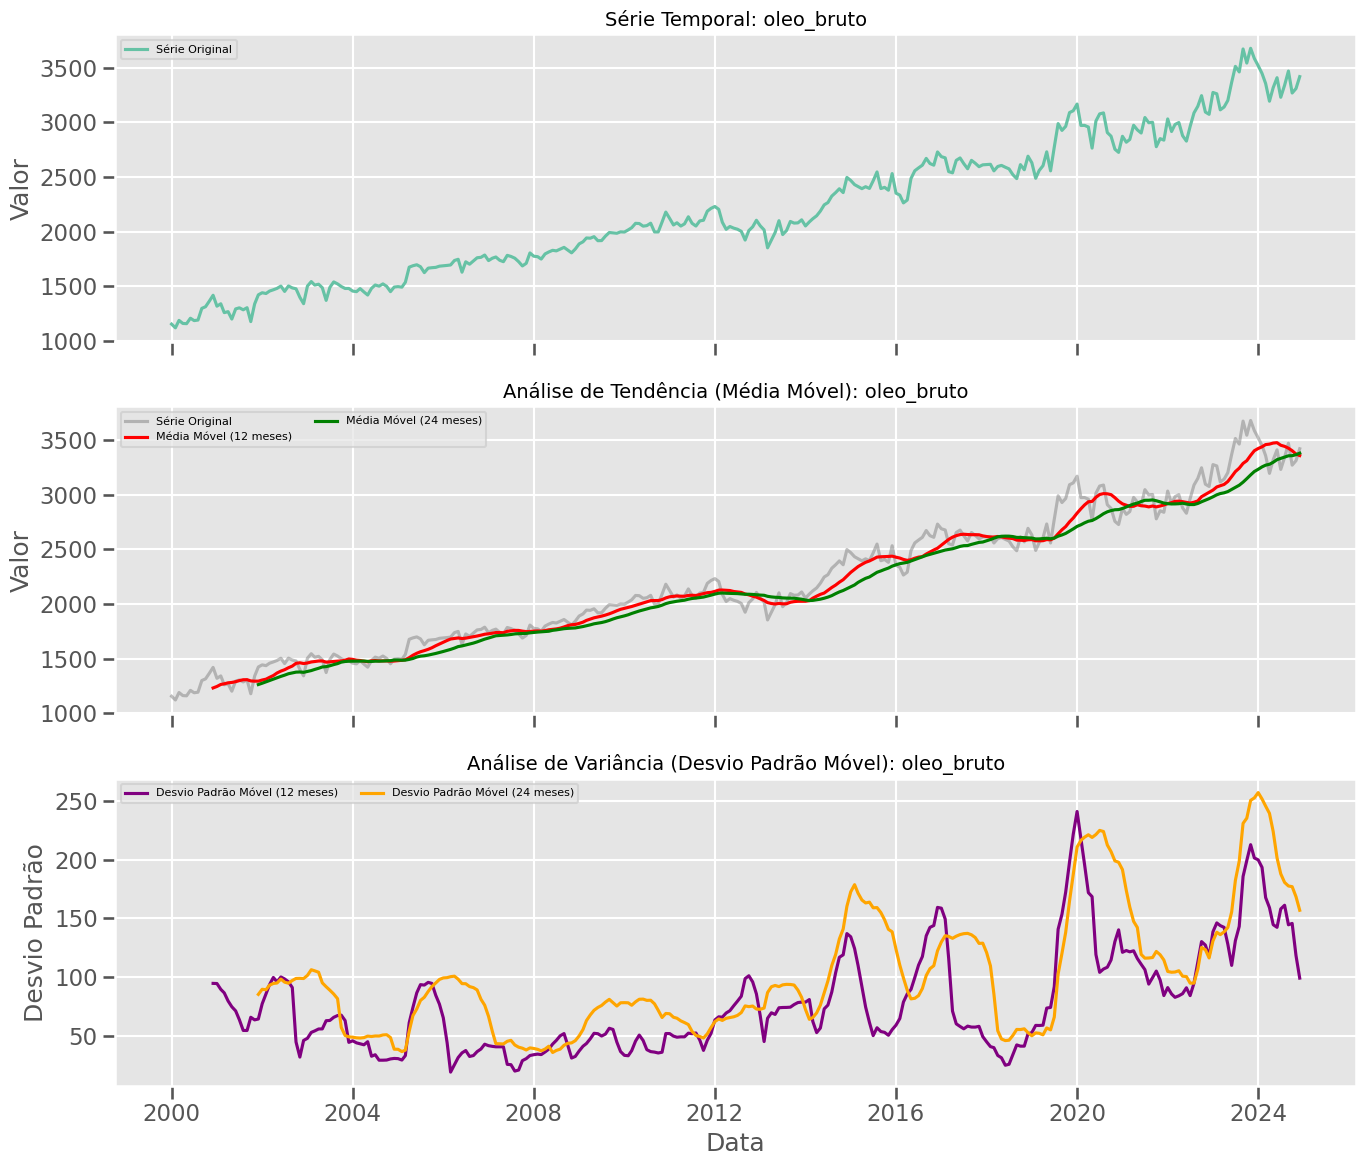


Estatísticas básicas para oleo_bruto:
--------------------------------------------------
Média: 2195.1600
Mediana: 2077.5000
Desvio Padrão: 631.1693
--------------------------------------------------

Análise visual de estacionariedade para oleo_bruto:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 2243.8333
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 12.5054

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------


In [13]:
# Aplicar a análise de série temporal para cada variável
variables_to_analyze = ['ipca', 'ear', 'oleo_bruto']

for var in variables_to_analyze:
    print(f"\n{'=' * 80}")
    print(f"Análise de Série Temporal para: {var}")
    print(f"{'=' * 80}")
    plot_time_series_stationarity(time_series_df, var)

#### 📉 Tabela Resumo Final – Estacionariedade (Teste ADF + Análise Visual)

| Variável       | Tendência Aparente | Heterocedasticidade (Razão máx/mín) | Estatística ADF | Valor-p | Conclusão ADF                   | Conclusão Visual               | Requer Tratamento? |
|----------------|---------------------|--------------------------------------|------------------|---------|----------------------------------|-------------------------------|---------------------|
| **IPCA**       | Sim (variação média: 1.18) | Sim (10.08)                        | -8.3602          | 0.0000  | ✅ Série estacionária            | ❌ Não estacionária visualmente| **Não**              |
| **EAR**        | Sim (variação média: 32.25) | Sim (7.02)                         | -2.5510          | 0.1036  | ❌ Série não estacionária        | ❌ Não estacionária visualmente| **Sim**              |
| **Óleo Bruto** | Sim (variação média: 2243.83) | Sim (12.51)                     | -0.4786          | 0.8961  | ❌ Série não estacionária        | ❌ Não estacionária visualmente| **Sim**              |


==================================================================================================================================================================================================================================================================


### 6. Tratamento de Variáveis

Nesta seção, realizaremos o tratamento das variáveis que apresentaram características de não-estacionariedade ou outros problemas identificados nas análises anteriores. O objetivo é preparar as séries temporais para a modelagem econométrica, garantindo que atendam aos requisitos necessários, como estacionariedade e estabilidade de variância.

As transformações recomendadas serão aplicadas conforme a tabela resumo apresentada anteriormente. Após o tratamento, as séries serão reavaliadas para confirmar a eficácia das transformações realizadas.


## 🔧 Tabela Resumo: Transformações Recomendadas para Estacionariedade

| Variável        | Transformação Recomendada        | Objetivo Principal                                      | Justificativa Técnica                                                                 |
|------------------|----------------------------------|----------------------------------------------------------|----------------------------------------------------------------------------------------|
| **IPCA**         | Nenhuma                          | Já é estacionária                                        | O teste ADF rejeitou a hipótese de raiz unitária; série pode ser usada no formato atual |
| **EAR**          | 1ª diferença (`x_t - x_(t-1)`)   | Remover tendência e estabilizar a média                 | Série apresenta tendência e leve heterocedasticidade; valores percentuais não exigem log |
| **Óleo Bruto**   | Log-diferença (`log(x_t) - log(x_(t-1))`) | Reduzir escala e estabilizar variância         | Série tem escala alta e variância crescente; transformação ajuda a lidar com isso e permite interpretação percentual |


In [14]:
# Aplicando as transformações recomendadas para alcançar estacionariedade
# Criando uma cópia do DataFrame para não modificar o original
df_transformed = df.copy()

# 1. Aplicando a primeira diferença (x_t - x_{t-1}) na variável EAR
df_transformed['ear_diff'] = df_transformed['ear'].diff()

# 2. Aplicando a log-diferença (log(x_t) - log(x_{t-1})) na variável Óleo Bruto
df_transformed['oleo_bruto_log_diff'] = np.log(df_transformed['oleo_bruto']).diff()

# Removendo as primeiras linhas que terão valores NaN devido à diferenciação
df_transformed = df_transformed.dropna(subset=['ear_diff', 'oleo_bruto_log_diff'])

# Visualizando as primeiras linhas do DataFrame transformado
print("Primeiras linhas do DataFrame com as variáveis transformadas:")
display(df_transformed[['ipca', 'ear', 'ear_diff', 'oleo_bruto', 'oleo_bruto_log_diff']].head())

# Visualizando estatísticas descritivas das variáveis transformadas
print("\nEstatísticas descritivas das variáveis transformadas:")
display(df_transformed[['ear_diff', 'oleo_bruto_log_diff']].describe().T)

Primeiras linhas do DataFrame com as variáveis transformadas:


,ipca,ear,ear_diff,oleo_bruto,oleo_bruto_log_diff
1,0.13,52.108976,10.764014,1121,-0.029879
2,0.22,62.794431,10.685455,1189,0.058891
3,0.42,66.530108,3.735677,1161,-0.023831
4,0.01,61.894345,-4.635762,1159,-0.001724
5,0.23,54.794167,-7.100179,1209,0.042236



Estatísticas descritivas das variáveis transformadas:


,count,mean,std,min,25%,50%,75%,max
ear_diff,299.0,0.037953,5.903282,-14.593406,-4.305174,-0.20190,4.569417,14.046825
oleo_bruto_log_diff,299.0,0.003630,0.033736,-0.102385,-0.014679,0.00292,0.021242,0.128105


In [15]:
# Realizando o teste ADF nas variáveis transformadas
print("\n" + "="*80)
print("TESTES DE ESTACIONARIEDADE NAS SÉRIES TRANSFORMADAS")
print("="*80)

# Teste para EAR diferenciada
test_adf(df_transformed['ear_diff'], 'Energia Armazenada (EAR) - Primeira Diferença')

# Teste para Óleo Bruto com log-diferença
test_adf(df_transformed['oleo_bruto_log_diff'], 'Óleo Bruto - Log-Diferença')


TESTES DE ESTACIONARIEDADE NAS SÉRIES TRANSFORMADAS
Teste ADF para Energia Armazenada (EAR) - Primeira Diferença
--------------------------------------------------
Estatística ADF: -5.7136
Valor p: 0.0000
Valores críticos:
	1%: -3.4533
	5%: -2.8717
	10%: -2.5722
Conclusão: Rejeitamos a hipótese nula.  A série Energia Armazenada (EAR) - Primeira Diferença é estacionária (não possui raiz unitária).


Teste ADF para Óleo Bruto - Log-Diferença
--------------------------------------------------
Estatística ADF: -11.1966
Valor p: 0.0000
Valores críticos:
	1%: -3.4527
	5%: -2.8714
	10%: -2.5720
Conclusão: Rejeitamos a hipótese nula.  A série Óleo Bruto - Log-Diferença é estacionária (não possui raiz unitária).





ANÁLISE VISUAL DE ESTACIONARIEDADE - SÉRIES TRANSFORMADAS

Análise de Série Temporal para: EAR - Primeira Diferença


<Figure size 1400x1000 with 0 Axes>

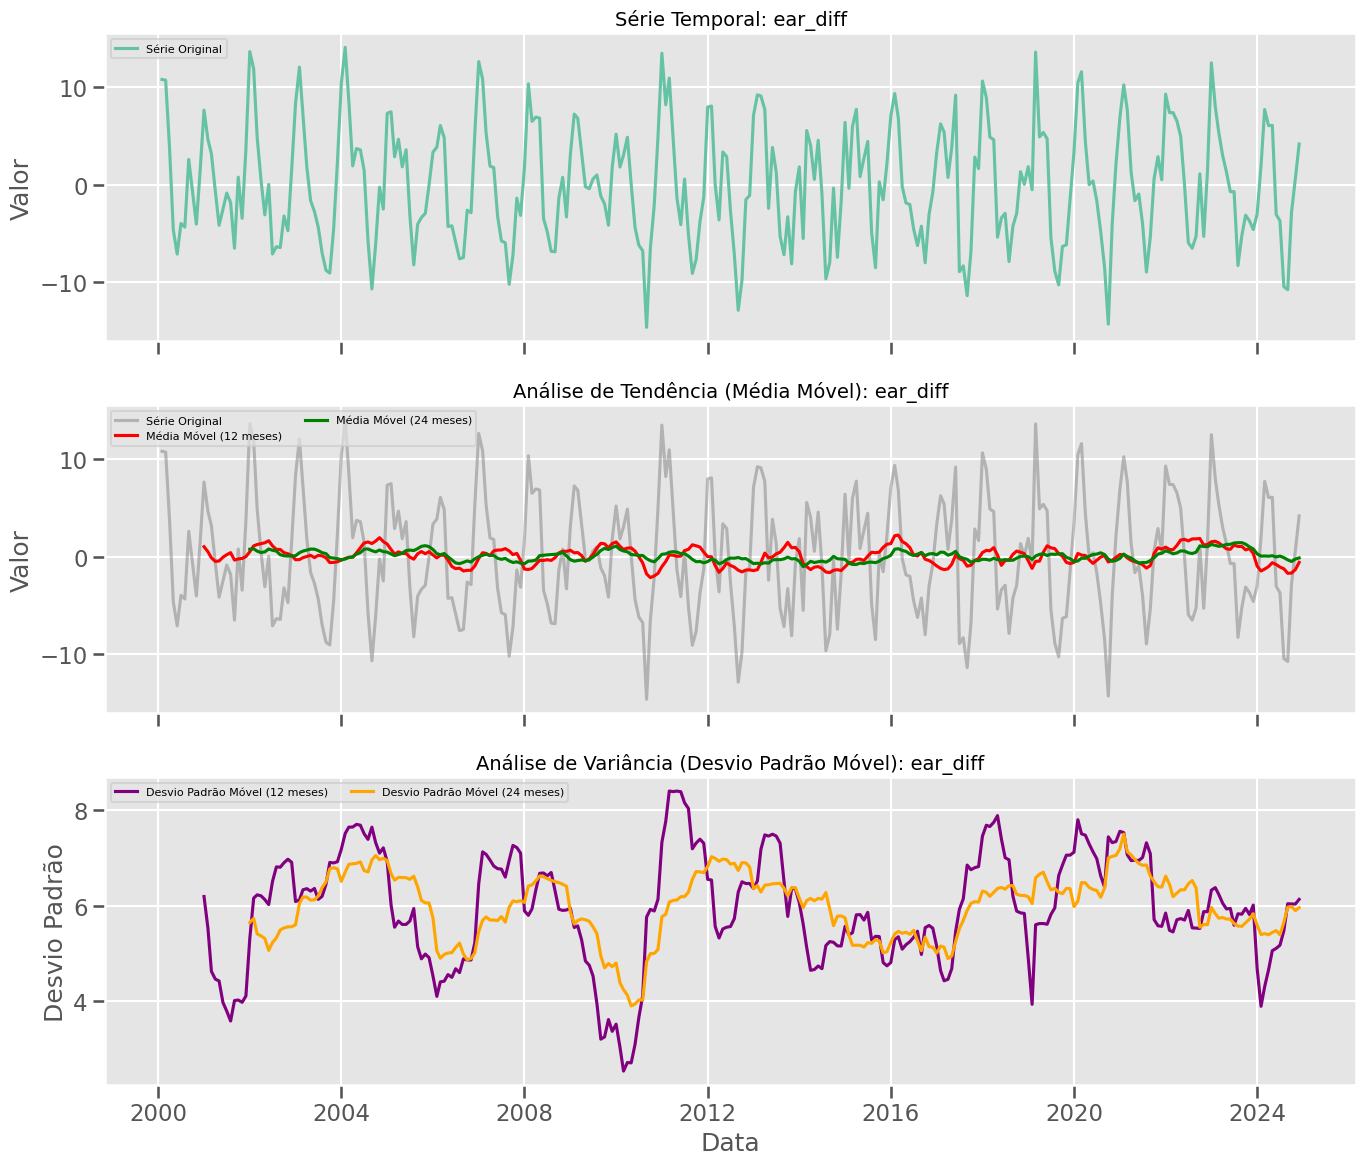


Estatísticas básicas para ear_diff:
--------------------------------------------------
Média: 0.0380
Mediana: -0.2019
Desvio Padrão: 5.9033
--------------------------------------------------

Análise visual de estacionariedade para ear_diff:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 4.3491
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 3.3183

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------

Análise de Série Temporal para: Óleo Bruto - Log-Diferença


<Figure size 1400x1000 with 0 Axes>

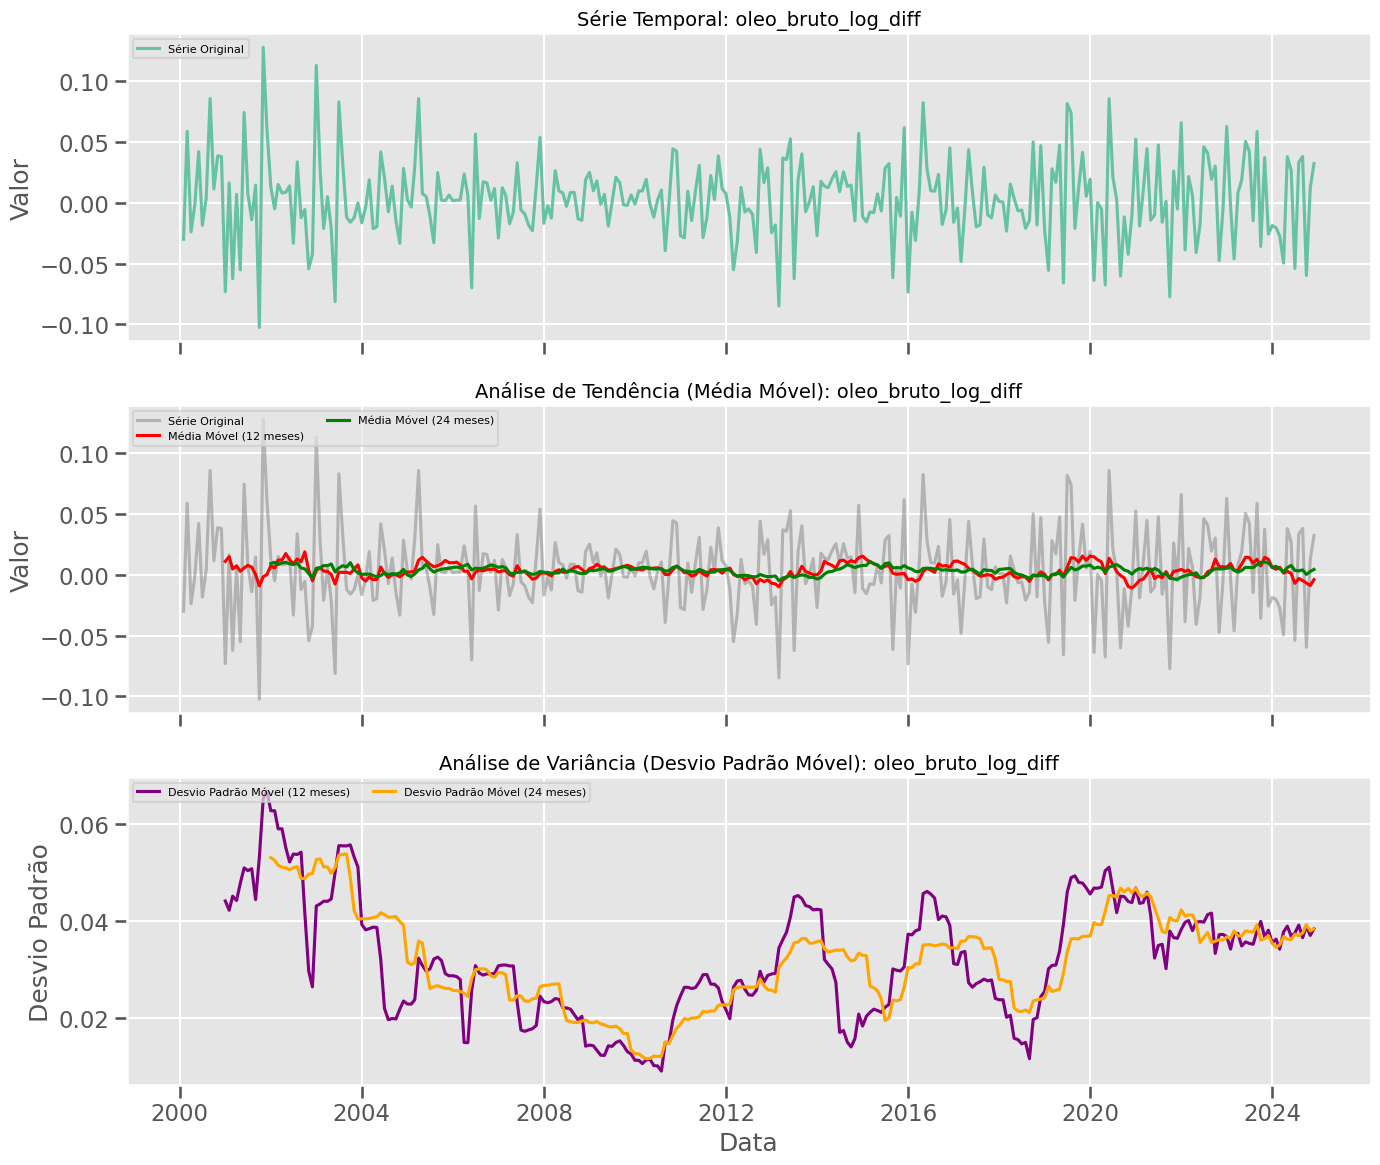


Estatísticas básicas para oleo_bruto_log_diff:
--------------------------------------------------
Média: 0.0036
Mediana: 0.0029
Desvio Padrão: 0.0337
--------------------------------------------------

Análise visual de estacionariedade para oleo_bruto_log_diff:
----------------------------------------------------------------------
Tendência: A série parece apresentar tendência (média não constante ao longo do tempo)
  Variação na média móvel: 0.0298
Variância: A série parece apresentar heterocedasticidade (variância não constante)
  Razão máx/mín do desvio padrão: 7.5026

Conclusão preliminar: A série apresenta características de não-estacionariedade
----------------------------------------------------------------------


In [16]:
# Análise visual de estacionariedade para as variáveis transformadas
# Criando um DataFrame de séries temporais com as variáveis transformadas
time_series_transformed_df = df_transformed.copy()
if 'data' in time_series_transformed_df.columns:
    time_series_transformed_df = time_series_transformed_df.set_index('data')

# Aplicar a análise visual para cada variável transformada
print("\n" + "="*80)
print("ANÁLISE VISUAL DE ESTACIONARIEDADE - SÉRIES TRANSFORMADAS")
print("="*80)

# Análise para EAR diferenciada
print("\n" + "="*80)
print("Análise de Série Temporal para: EAR - Primeira Diferença")
print("="*80)
plot_time_series_stationarity(time_series_transformed_df, 'ear_diff')

# Análise para Óleo Bruto com log-diferença
print("\n" + "="*80)
print("Análise de Série Temporal para: Óleo Bruto - Log-Diferença")
print("="*80)
plot_time_series_stationarity(time_series_transformed_df, 'oleo_bruto_log_diff')

### 📉 Tabela Resumo – Estacionariedade das Séries Transformadas (Visual + ADF)

| Variável Transformada           | Transformação Aplicada                        | Estatística ADF | Valor-p | Conclusão ADF                          | Variação na Média Móvel | Razão Máx/Mín do Desvio Padrão | Conclusão Visual                  |
|----------------------------------|-----------------------------------------------|------------------|---------|----------------------------------------|--------------------------|------------------------------|------------------------------|
| **EAR (Energia Armazenada)**     | 1ª diferença (`x_t - x_(t-1)`)                | -5.7136          | 0.0000  | ✅ Série estacionária                   | 4.3491                   | 3.3183                       | ❌ Aparência de não-estacionária |
| **Óleo Bruto**                   | Log-diferença (`log(x_t) - log(x_(t-1))`)     | -11.1966         | 0.0000  | ✅ Série estacionária                   | 0.0298                   | 7.5026                       | ❌ Aparência de não-estacionária |



### 7. Análise de Correlação entre IPCA, EAR_Diff e Óleo Bruto (Log-Diferença)

Nesta seção, realizaremos uma análise de correlação entre as variáveis transformadas `ear_diff` (diferença da energia armazenada), `oleo_bruto_log_diff` (log-diferença da produção de óleo bruto) e o índice de preços ao consumidor amplo (`ipca`). 

O objetivo é identificar a força e a direção das relações lineares entre essas variáveis, fornecendo insights iniciais sobre possíveis interdependências que podem ser exploradas em modelagens econométricas futuras. Utilizaremos métricas como o coeficiente de correlação de Pearson e visualizações gráficas para apoiar a análise.


##### Análise de Correlação Cruzada (CCF) entre IPCA e Variáveis Transformadas

A correlação cruzada (Cross-Correlation Function - CCF) é uma técnica estatística que mede a relação entre duas séries temporais em diferentes defasagens. Esta análise nos permite identificar se mudanças em uma variável precedem, coincidem ou seguem mudanças em outra variável, e com qual intensidade ocorre essa relação.

Abaixo, visualizaremos os gráficos de CCF entre o IPCA e as variáveis transformadas (ear_diff e oleo_bruto_log_diff), além de apresentarmos uma tabela com os valores específicos das correlações em diferentes defasagens.

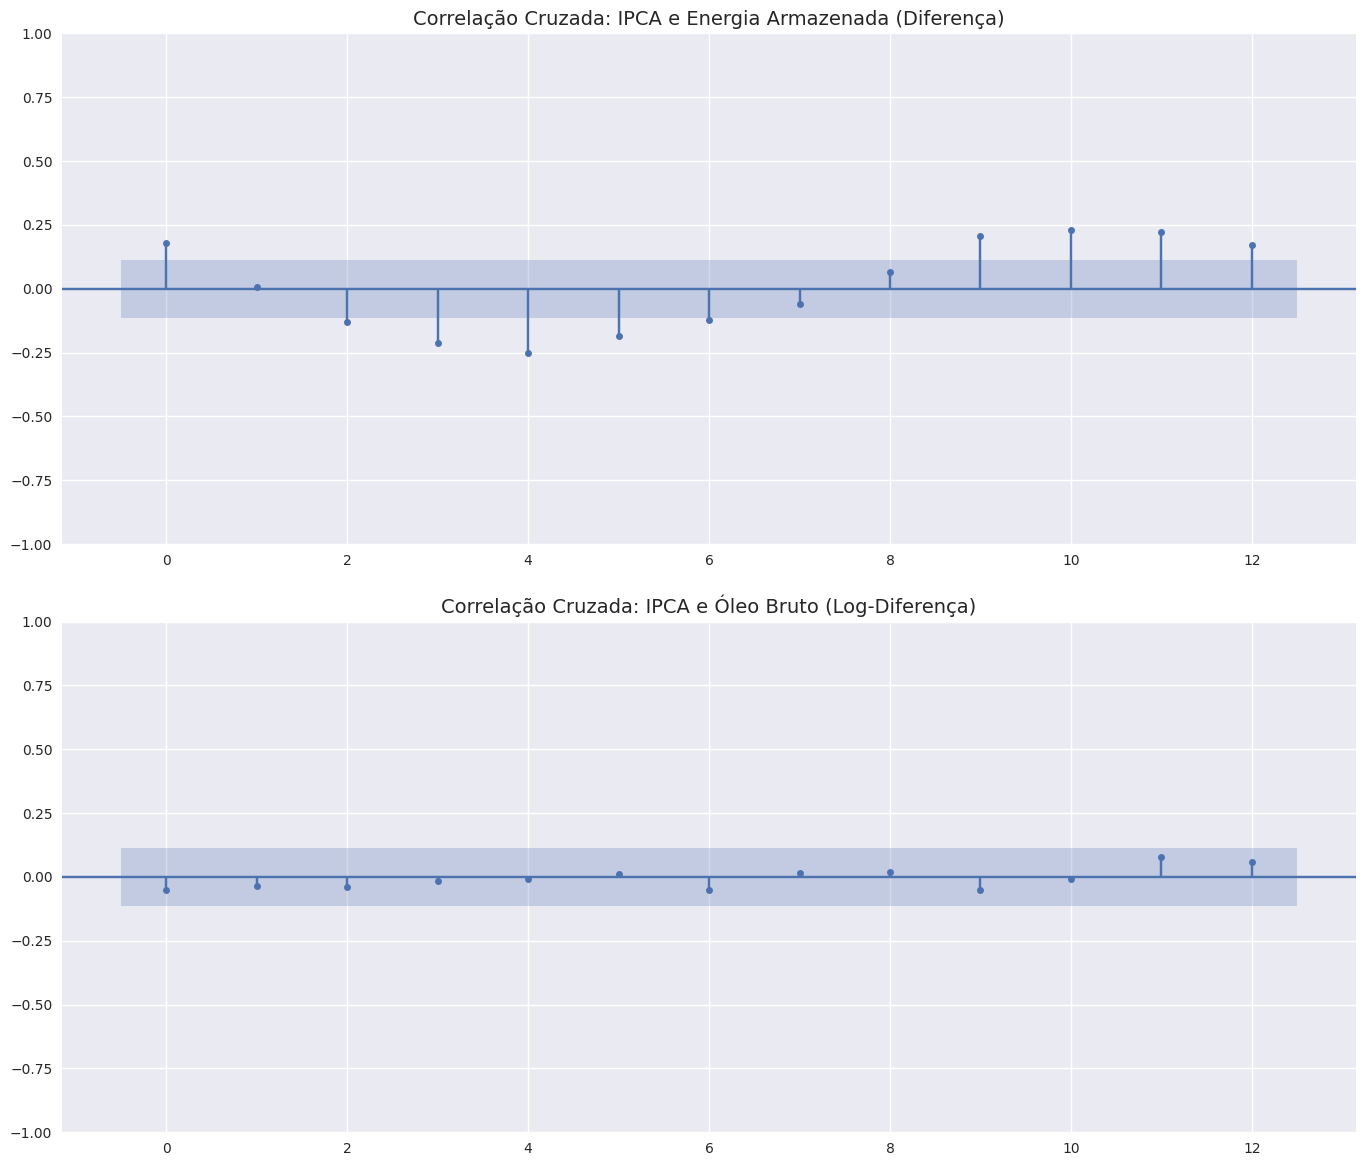

In [17]:
# Análise de Correlação Cruzada (CCF) usando statsmodels.graphics.tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_ccf
import matplotlib.pyplot as plt

# Configuração para melhorar a visualização
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 10)

# Definindo o número máximo de lags para análise
lags = 12

# Criando uma figura com 2 subplots para CCF
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Gráfico CCF entre IPCA e EAR (diferença)
plot_ccf(df_transformed['ipca'], df_transformed['ear_diff'], lags=lags, ax=axes[0])
axes[0].set_title('Correlação Cruzada: IPCA e Energia Armazenada (Diferença)', fontsize=14)
axes[0].grid(True)

# Gráfico CCF entre IPCA e Óleo Bruto (log-diferença)
plot_ccf(df_transformed['ipca'], df_transformed['oleo_bruto_log_diff'], lags=lags, ax=axes[1])
axes[1].set_title('Correlação Cruzada: IPCA e Óleo Bruto (Log-Diferença)', fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.show()

Correlações entre IPCA e variáveis transformadas com defasagens:


,Lag (meses),"Corr(ipca, oleo_bruto_lag)","Corr(ipca, ear_lag)"
0,0,-0.05,0.18
1,1,-0.04,0.01
2,2,-0.04,-0.13
3,3,-0.02,-0.21
4,4,-0.01,-0.25
5,5,0.01,-0.19
6,6,-0.05,-0.13
7,7,0.02,-0.06
8,8,0.02,0.07
9,9,-0.05,0.22


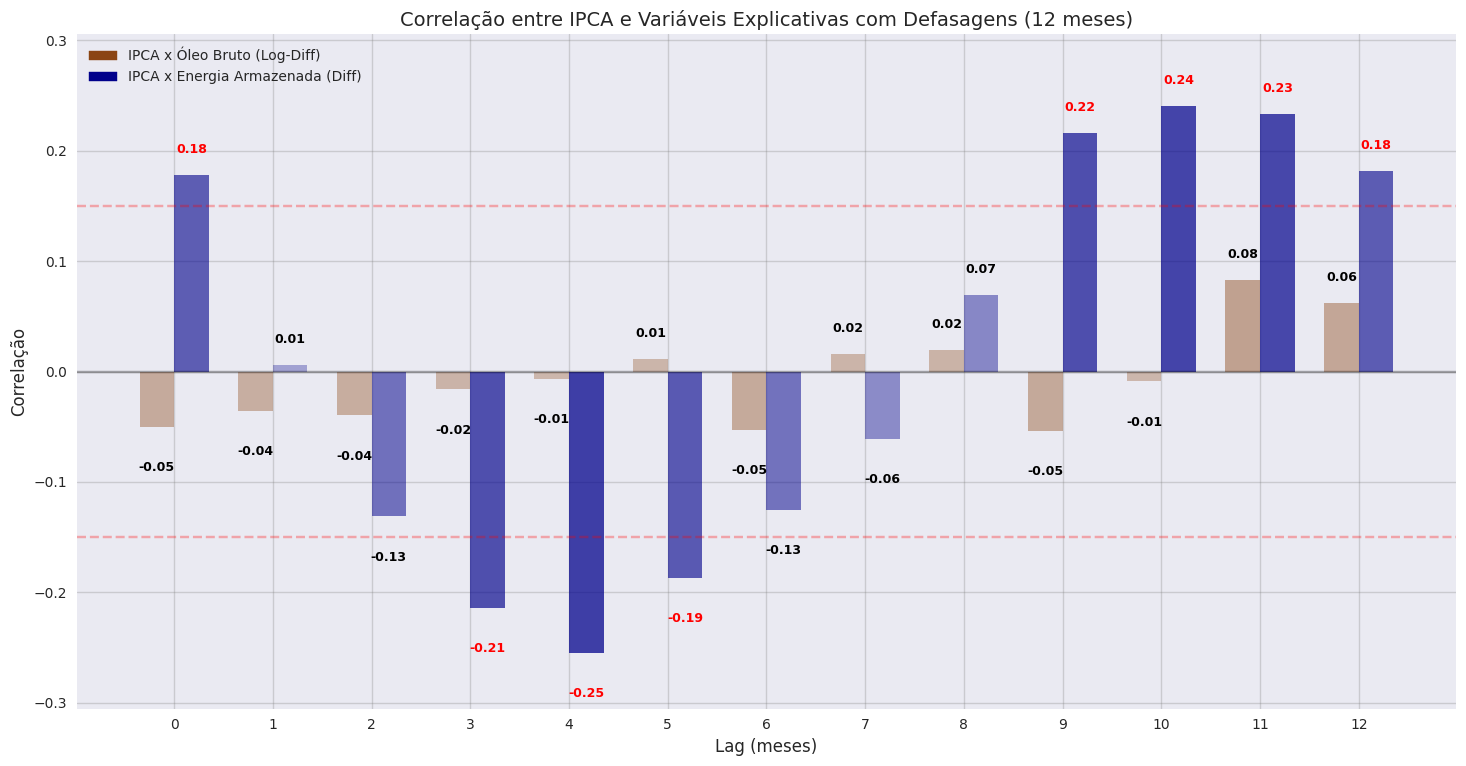

In [18]:
# Calculando as correlações entre IPCA e as variáveis transformadas com diferentes defasagens (lags)
max_lag = 12
lag_data = {'Lag (meses)': list(range(max_lag + 1))}

# Criando variáveis com defasagens para Óleo Bruto (log-diferença)
oil_lag_corr = []
for lag in range(max_lag + 1):
    # Criando a série defasada
    oil_lagged = df_transformed['oleo_bruto_log_diff'].shift(lag)
    # Calculando a correlação e armazenando
    corr = df_transformed['ipca'].corr(oil_lagged)
    oil_lag_corr.append(corr)

# Criando variáveis com defasagens para Energia Armazenada (diferença)
ear_lag_corr = []
for lag in range(max_lag + 1):
    # Criando a série defasada
    ear_lagged = df_transformed['ear_diff'].shift(lag)
    # Calculando a correlação e armazenando
    corr = df_transformed['ipca'].corr(ear_lagged)
    ear_lag_corr.append(corr)

# Criando o DataFrame com os resultados das correlações
lag_data['Corr(ipca, oleo_bruto_lag)'] = oil_lag_corr
lag_data['Corr(ipca, ear_lag)'] = ear_lag_corr

lag_df = pd.DataFrame(lag_data)

# Exibindo a tabela formatada
print("Correlações entre IPCA e variáveis transformadas com defasagens:")
display(lag_df.style.format({
    'Corr(ipca, oleo_bruto_lag)': '{:.2f}',
    'Corr(ipca, ear_lag)': '{:.2f}'
}))

# Visualização gráfica das correlações
plt.figure(figsize=(15, 8))
width = 0.35
x = np.arange(len(lag_df['Lag (meses)']))

# Definindo cores base para as barras
oil_color = '#8B4513'  # Marrom escuro para óleo
ear_color = '#00008B'  # Azul escuro para energia

# Plotando barras individualmente para poder ajustar a transparência de cada uma
for i, (oil_val, ear_val) in enumerate(zip(lag_df['Corr(ipca, oleo_bruto_lag)'], lag_df['Corr(ipca, ear_lag)'])):
    # Calculando opacidade baseada na força da correlação
    oil_alpha = min(0.3 + abs(oil_val)*1.7, 1.0)
    ear_alpha = min(0.3 + abs(ear_val)*1.7, 1.0)
    
    # Plotando barras individuais
    plt.bar(i - width/2, oil_val, width, color=oil_color, alpha=oil_alpha)
    plt.bar(i + width/2, ear_val, width, color=ear_color, alpha=ear_alpha)

    # Adicionando texto nas barras
    text_color_oil = 'red' if abs(oil_val) > 0.15 else 'black'
    text_color_ear = 'red' if abs(ear_val) > 0.15 else 'black'
    
    y_offset_oil = 0.02 if oil_val >= 0 else -0.04
    y_offset_ear = 0.02 if ear_val >= 0 else -0.04
    
    plt.text(i - width/2, oil_val + y_offset_oil, f'{oil_val:.2f}', 
             ha='center', fontsize=9, fontweight='bold', color=text_color_oil)
    
    plt.text(i + width/2, ear_val + y_offset_ear, f'{ear_val:.2f}', 
             ha='center', fontsize=9, fontweight='bold', color=text_color_ear)

# Adicionando legendas manualmente para evitar múltiplas entradas
import matplotlib.patches as mpatches
oil_patch = mpatches.Patch(color=oil_color, label='IPCA x Óleo Bruto (Log-Diff)')
ear_patch = mpatches.Patch(color=ear_color, label='IPCA x Energia Armazenada (Diff)')
plt.legend(handles=[oil_patch, ear_patch], loc='best')

plt.xlabel('Lag (meses)', fontsize=12)
plt.ylabel('Correlação', fontsize=12)
plt.title('Correlação entre IPCA e Variáveis Explicativas com Defasagens (12 meses)', fontsize=14)
plt.xticks(x, lag_df['Lag (meses)'])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, color='gray')

# Destacando o limite de significância estatística (exemplo)
plt.axhline(y=0.15, color='red', linestyle='--', alpha=0.3, label='Limite de significância')
plt.axhline(y=-0.15, color='red', linestyle='--', alpha=0.3)

# Ajustando os limites do eixo y para melhor visualização
y_max = max(max(abs(val) for val in oil_lag_corr), max(abs(val) for val in ear_lag_corr))
plt.ylim(-y_max*1.2, y_max*1.2)
plt.tight_layout()
plt.show()

#### 🔁 Tabela Resumo – Correlação Cruzada entre IPCA e Variáveis Explicativas (Transformadas)

| Par de Variáveis                     | Lags com Correlação Significativa  | Tipo de Correlação           | Interpretação                                                                 |
|-------------------------------------|------------------------------------|-------------------------------|--------------------------------------------------------------------------------|
| IPCA × Energia Armazenada (`ear_diff`) | Lag 4 (negativa) e Lags 9–12 (positivas) | Fraca a moderada             | Pode haver efeito defasado: queda na EAR precede aumento no IPCA após alguns meses |
| IPCA × Óleo Bruto (`oleo_bruto_log_diff`) | Nenhum lag significativo           | Ausência de correlação linear | Log-diferença do petróleo não mostra impacto direto ou defasado no IPCA                 |


### Tabela de Correlações entre IPCA e Variáveis com Defasagens

A tabela abaixo apresenta os valores da correlação entre o IPCA e as variáveis explicativas (Óleo Bruto e Energia Armazenada) em diferentes defasagens temporais (lags). Valores positivos indicam uma relação direta, enquanto valores negativos indicam uma relação inversa. Quanto mais próximo de 1 ou -1, mais forte é a correlação.